## Getting the data


In [1]:
!kaggle competitions download -c playground-series-s4e10

import zipfile
import os

# Define the path to the zip file
zip_file_path = 'playground-series-s4e10.zip'

# Unzip the file to the current directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('.')

# Delete the zip file
os.remove(zip_file_path)


  0%|          | 0.00/1.45M [00:00<?, ?B/s]
 69%|██████▉   | 1.00M/1.45M [00:00<00:00, 1.41MB/s]
100%|██████████| 1.45M/1.45M [00:00<00:00, 1.88MB/s]


Reading all the data and putting it into df "dataset"

In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

dataset = pd.concat([train,test])

In [2]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [3]:
dublicates = train[train.duplicated()]
train.drop(dublicates.index, inplace=True)


## EDA

# Here’s a breakdown of what each column likely represents:

- id: This is likely a unique identifier for each loan application or borrower. It helps differentiate the records and is useful for indexing and tracking individual entries without revealing personal information.

- person_age: The age of the borrower. Age can be an important factor in determining the maturity and stability of the borrower, influencing their likelihood of repaying the loan.

- person_income: The annual income of the borrower. Higher incomes generally suggest a greater capacity to repay loans.

- person_home_ownership: Indicates the housing status of the borrower, such as owning a home, renting, or living with parents. This can impact the borrower's financial stability and their ability to repay the loan.

- person_emp_length: The number of years the borrower has been employed with their current employer. Longer employment length might indicate job stability, which is a positive signal in credit scoring.

- loan_intent: Describes the purpose of the loan. Common intents include education, medical expenses, and home improvement. Different intents may carry different levels of risk based on the reason for borrowing.

- loan_grade: A classification of the loan based on the risk associated with the borrower. Loans are typically graded from high credit quality (low risk) to low credit quality (high risk).

- loan_amnt: The amount of money borrowed. This figure is crucial for assessing the risk, as larger loans might be harder to repay depending on the borrower's financial situation.

- loan_int_rate: The interest rate on the loan. Higher interest rates may make loans more difficult to repay and are often associated with higher risk borrowers.

- loan_percent_income: This is the ratio of the loan amount to the borrower's annual income, expressed as a percentage. A high percentage can indicate that the loan constitutes a significant burden relative to the borrower's income.

- cb_person_default_on_file: Indicates whether the borrower has a history of defaulting on loans. "Y" might indicate a previous default, and "N" no defaults. This is a direct indicator of credit risk.

- cb_person_cred_hist_length: The length of the borrower's credit history in years. A longer credit history can provide more insight into the borrower's financial behavior and responsibility.

- loan_status: This is the target variable, usually indicating whether the loan was paid back or defaulted. It's what your model will attempt to predict based on the other features.

Checking for nan values 

In [5]:
dataset.isna().sum()


id                                0
person_age                        0
person_income                     0
person_home_ownership             0
person_emp_length                 0
loan_intent                       0
loan_grade                        0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_default_on_file         0
cb_person_cred_hist_length        0
loan_status                   39098
dtype: int64

In [6]:
dataset.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [4]:
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical colums:")
print(numerical_columns)

print()

categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:")
print(categorical_columns)


Numerical colums:
['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']

Categorical columns:
['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [8]:
for cat_columns in categorical_columns:
    print(cat_columns, sorted(dataset[cat_columns].unique()))

person_home_ownership ['MORTGAGE', 'OTHER', 'OWN', 'RENT']
loan_intent ['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE']
loan_grade ['A', 'B', 'C', 'D', 'E', 'F', 'G']
cb_person_default_on_file ['N', 'Y']


# Plots


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Pie Chart Distribution - imbalanced dataset

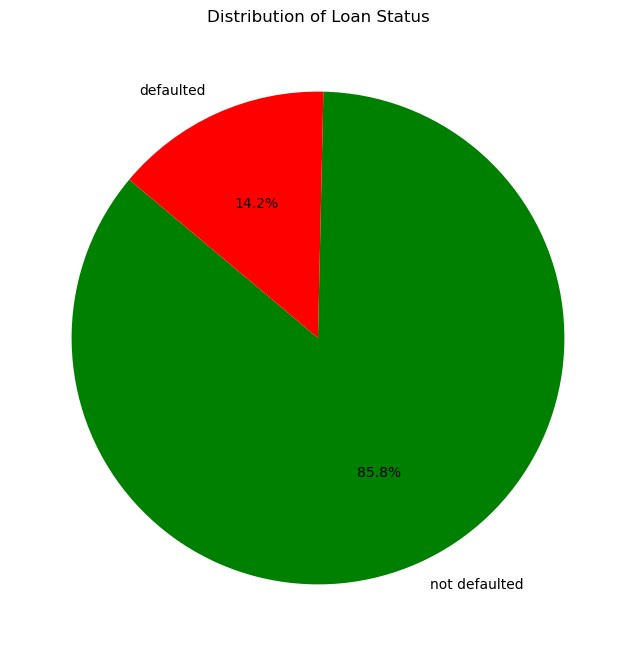

In [10]:
# Count the occurrences of each label
label_counts = dataset['loan_status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=["not defaulted", 'defaulted'],colors = ['green', 'red'], startangle=140, autopct='%1.1f%%')
plt.title('Distribution of Loan Status')
plt.show()

#### Histogram for both labels

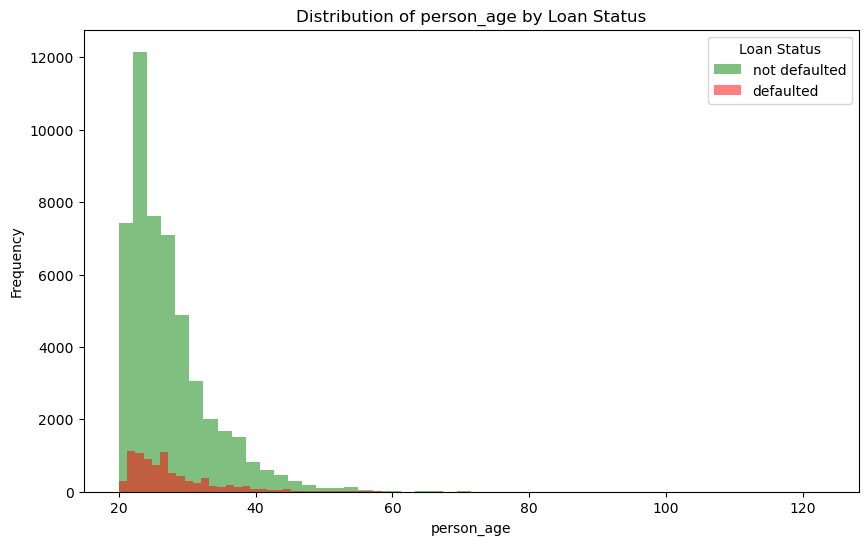

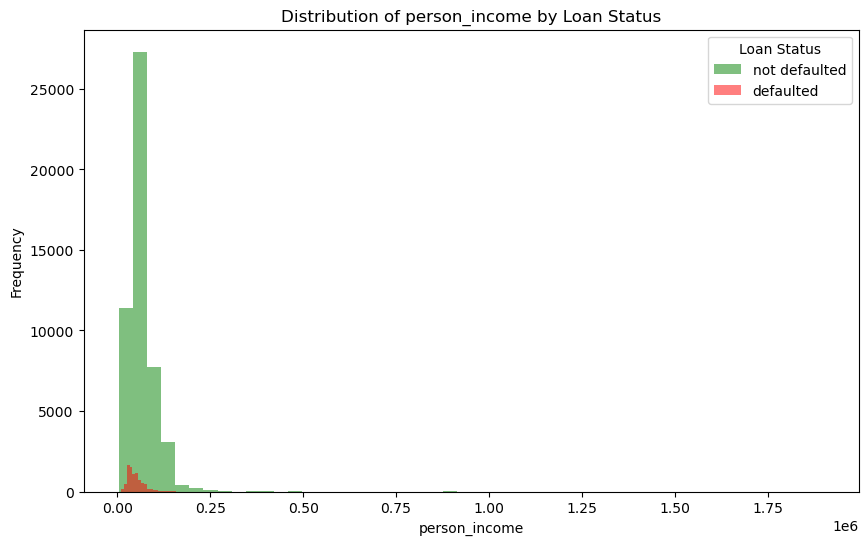

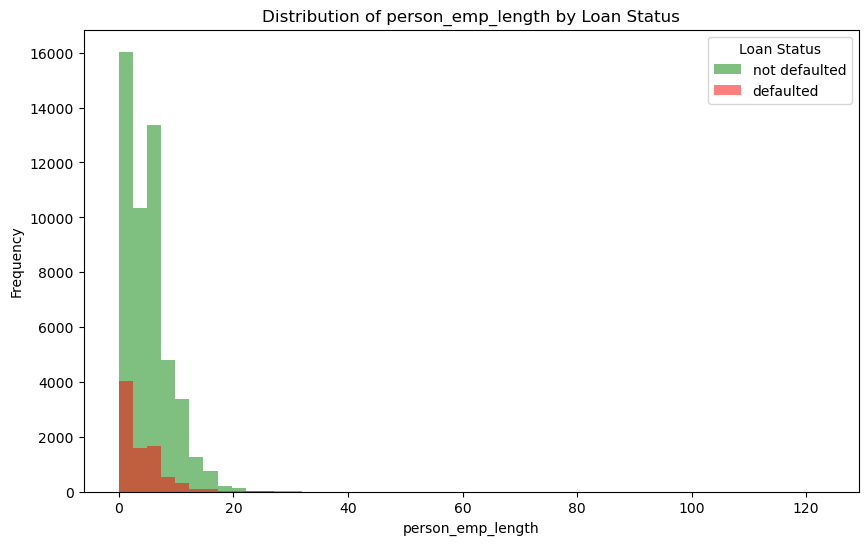

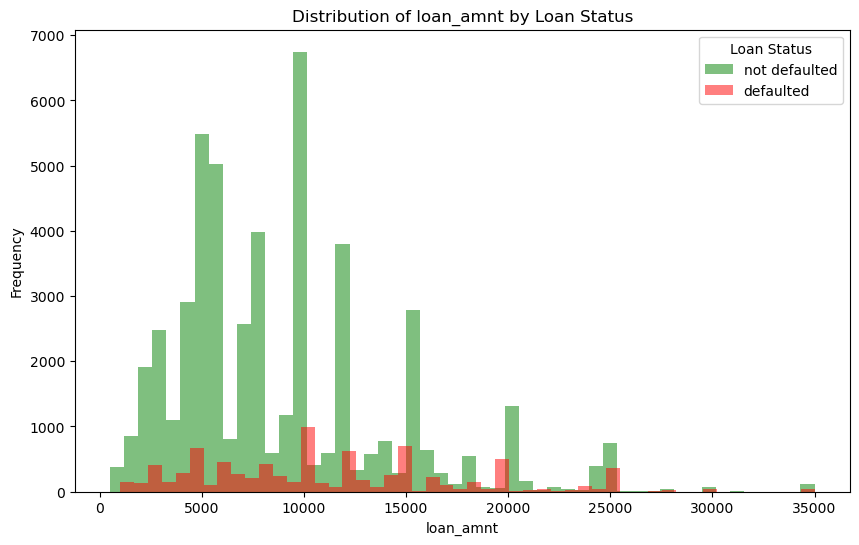

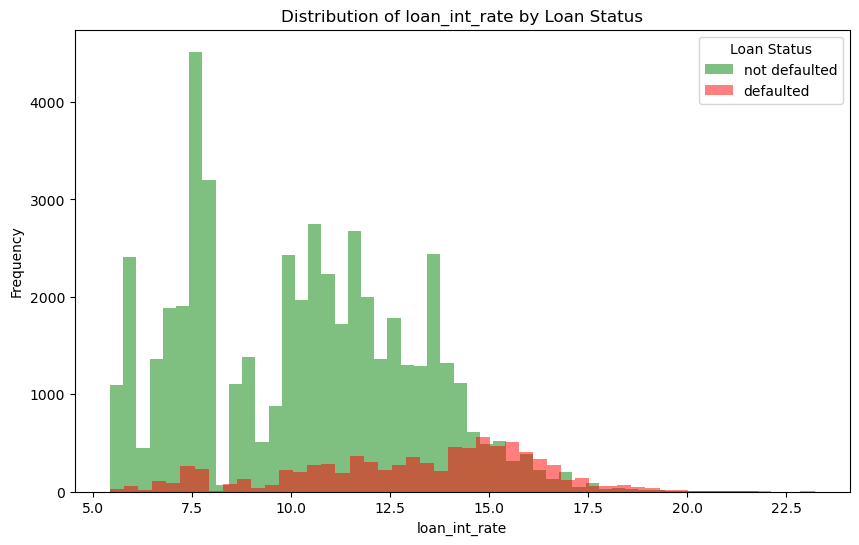

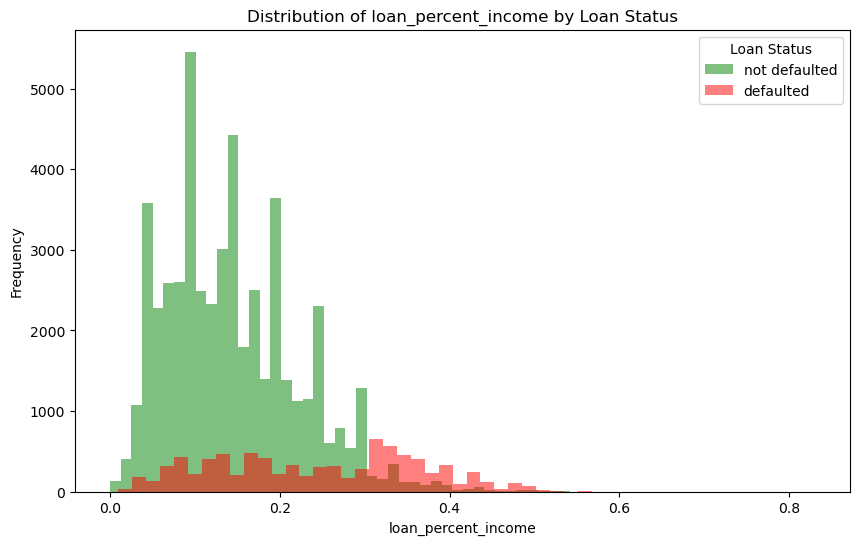

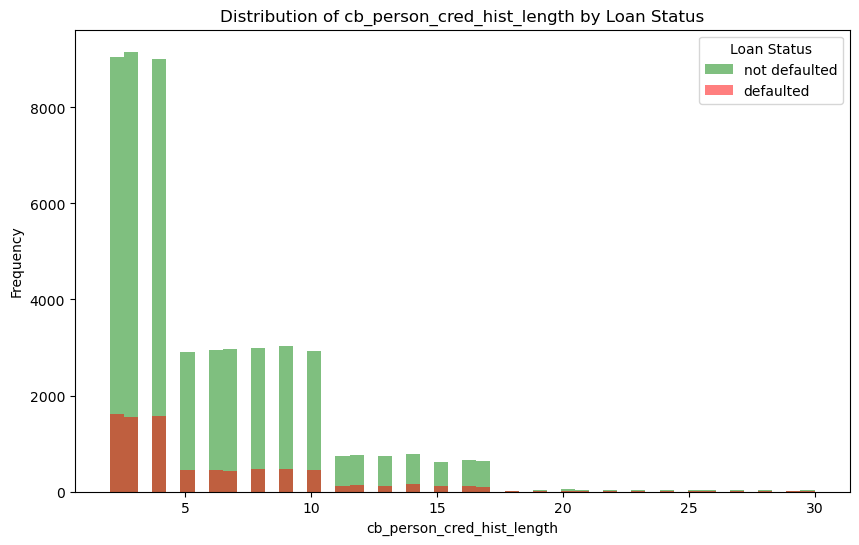

In [11]:
import matplotlib.pyplot as plt

# Define colors for each loan status
colors = ['green', 'red']

# Plot histograms for each numerical column
for column in numerical_columns:
    if column != 'loan_status':  # Skip the target variable
        if column in train.columns:  # Check if the column exists in the DataFrame
            plt.figure(figsize=(10, 6))
            for i, label in enumerate(train['loan_status'].unique()):
                plt.hist(train[train['loan_status'] == label][column], color=colors[i], bins=50, alpha=0.5, label=["not defaulted", "defaulted"][i])
            
            # Add title and labels
            plt.title(f'Distribution of {column} by Loan Status')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            
            # Add legend
            plt.legend(title='Loan Status')
            
            # Display the plot
            plt.show()

#### Fractions for Categorical Columns

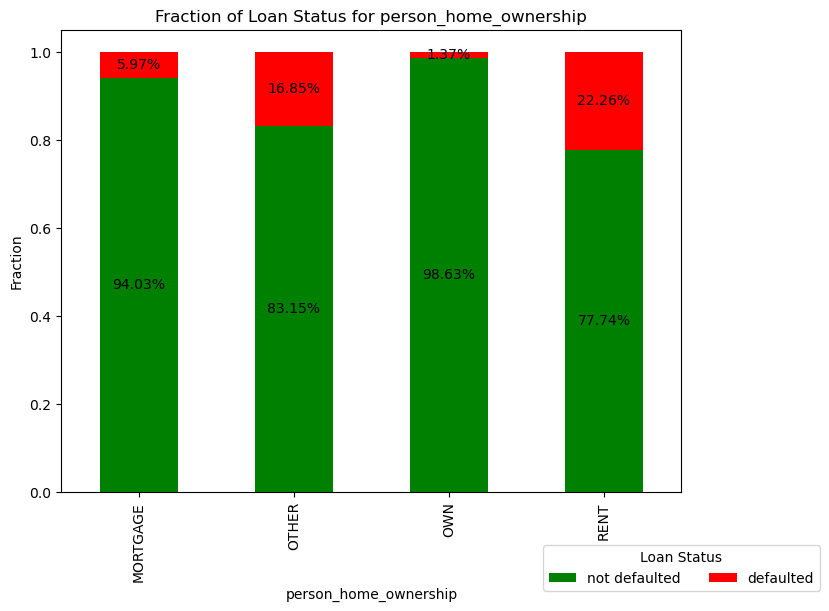

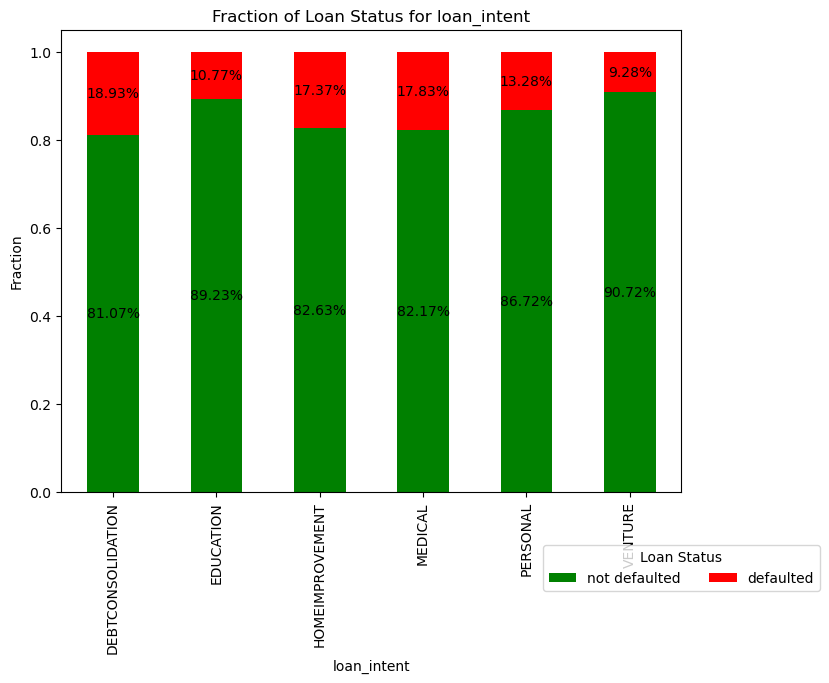

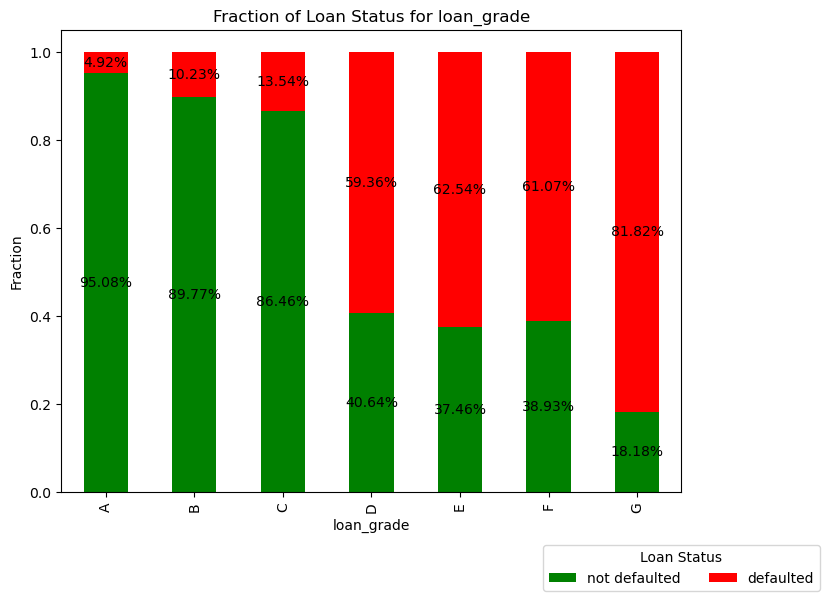

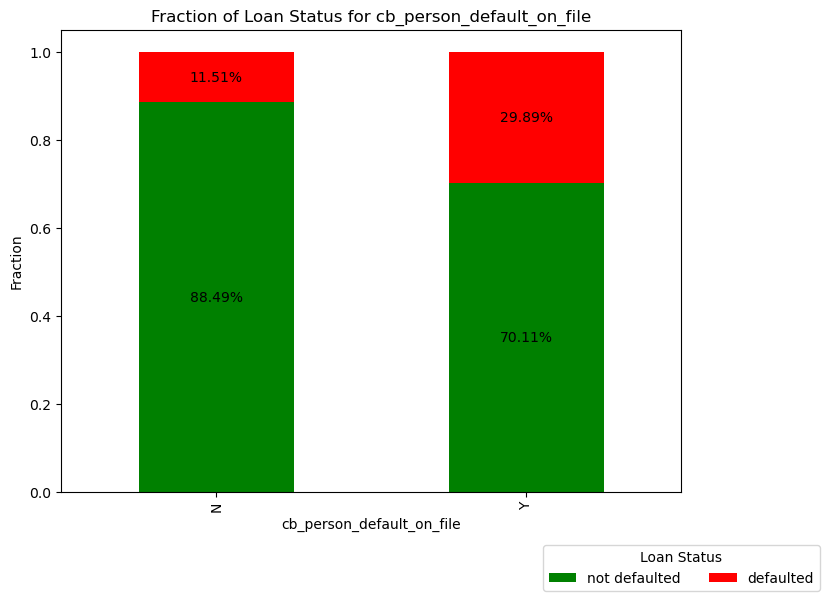

In [12]:
for columns in categorical_columns:
    plt.figure(figsize=(8, 6))
    counts = dataset.groupby([columns, 'loan_status']).size().unstack(fill_value=0)
    fraction = counts.div(counts.sum(axis=1), axis=0)
    ax = fraction.plot(kind='bar', stacked=True, ax=plt.gca(), color=['green', 'red'])
    
    # Adding annotations
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x()
        y = p.get_y()
        ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')
    
    plt.title(f'Fraction of Loan Status for {columns}')
    plt.ylabel('Fraction')
    plt.xlabel(columns)
    plt.legend(title='Loan Status', labels=['not defaulted', 'defaulted'], loc='upper center', bbox_to_anchor=(1, -0.1), ncol=2)
    plt.show()

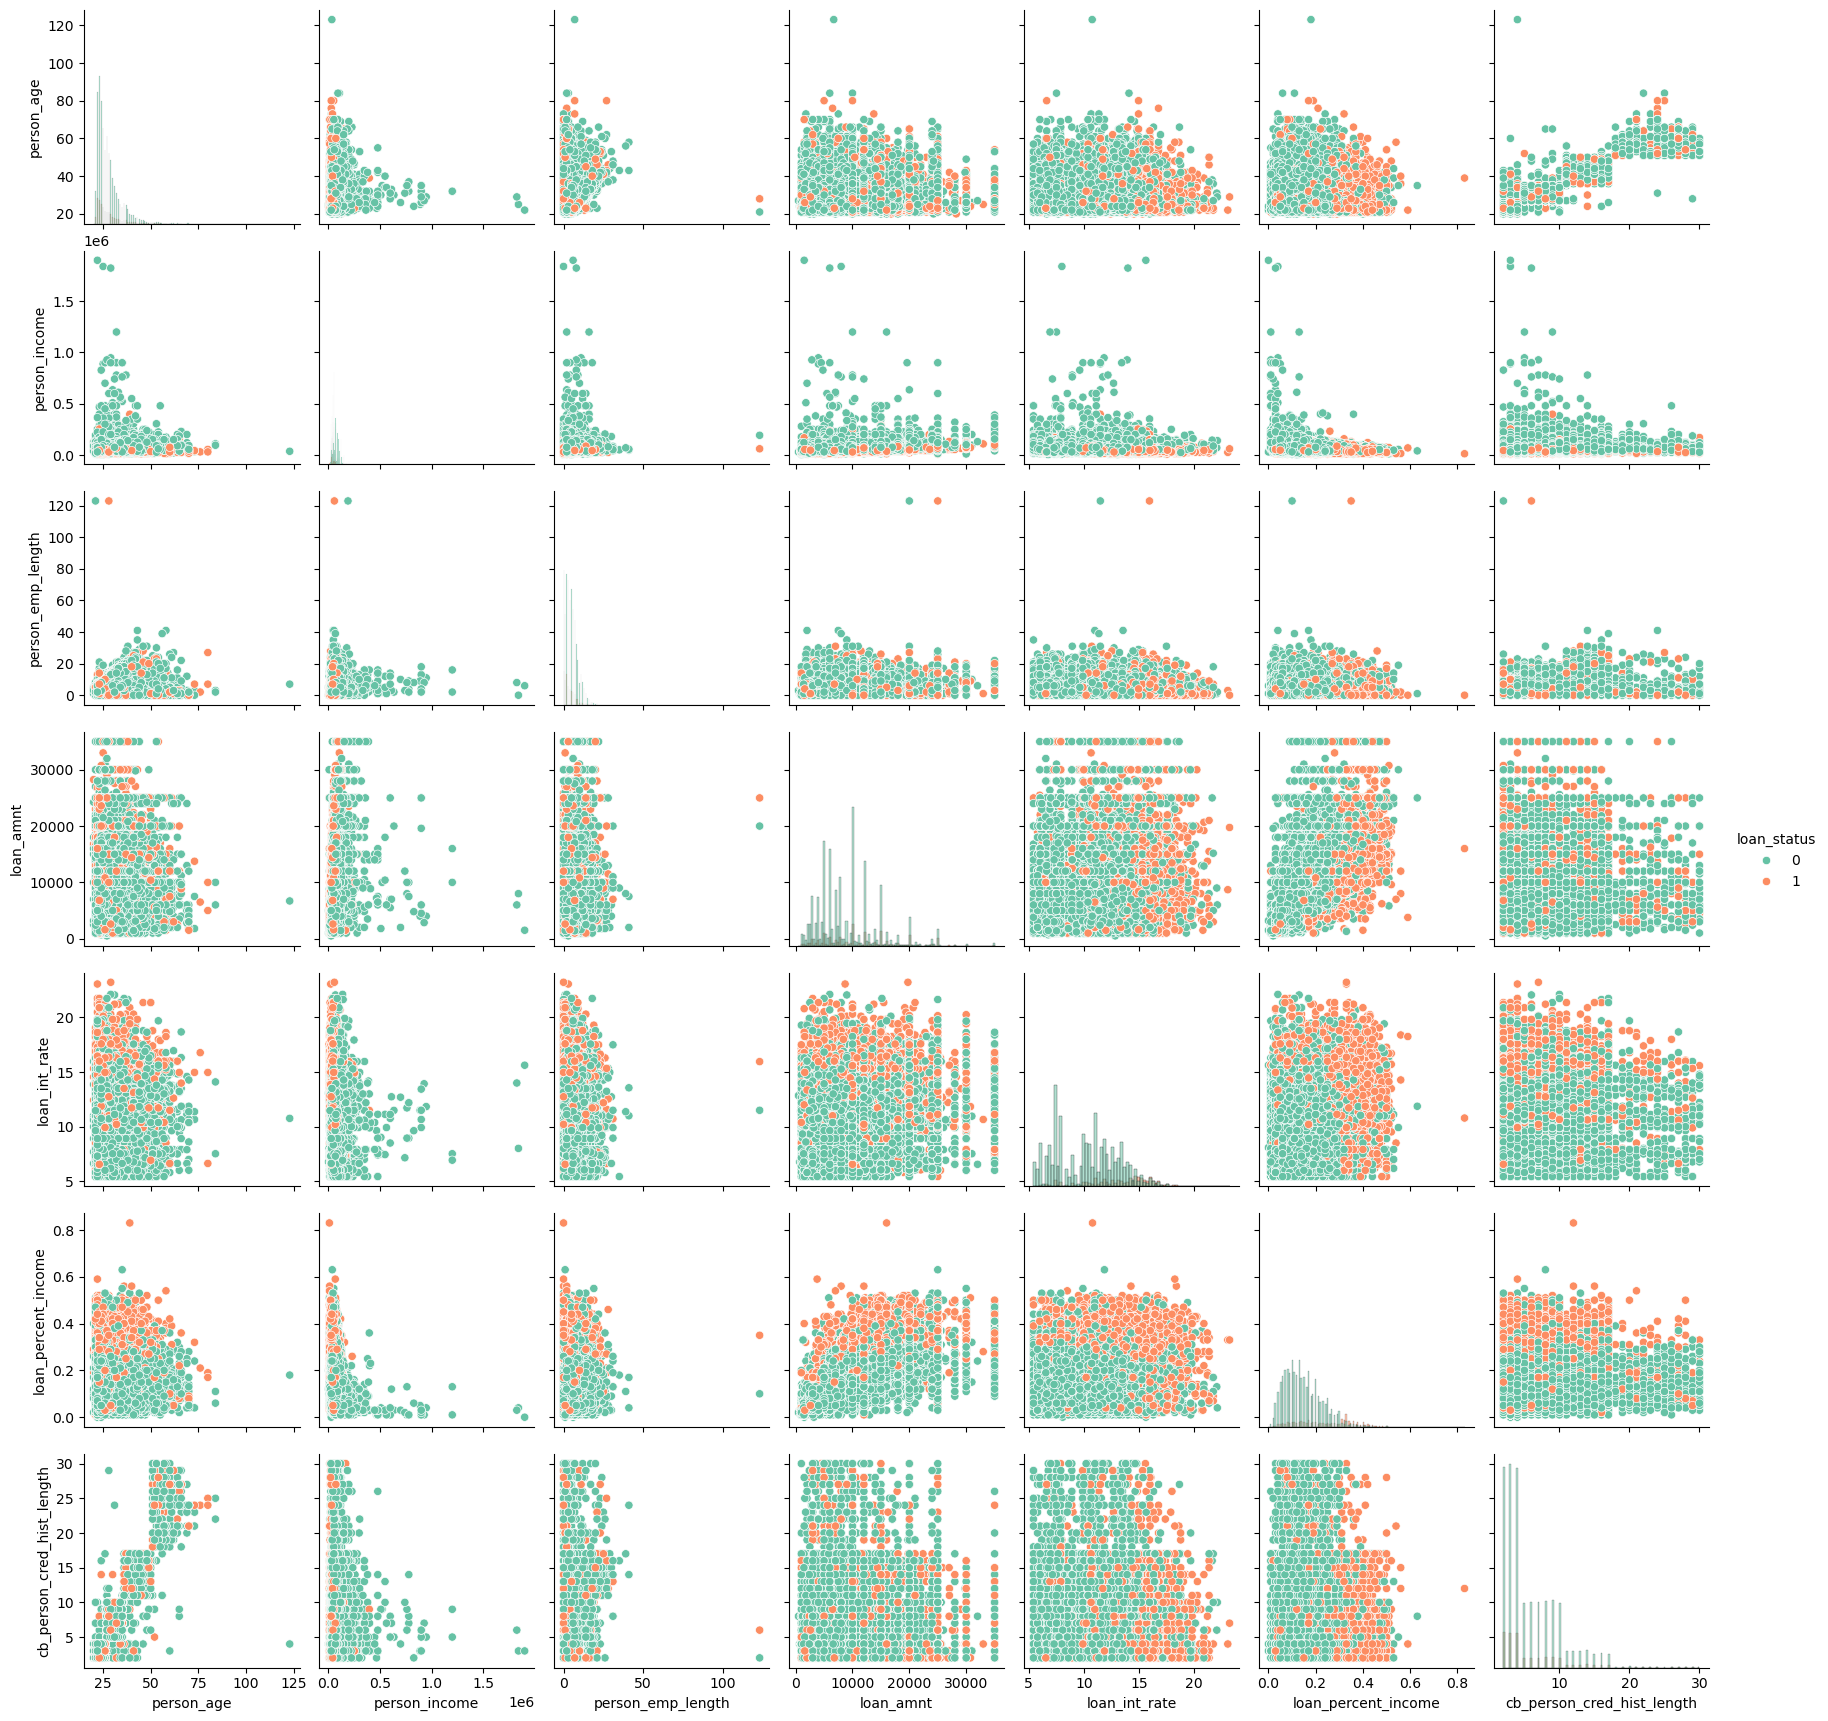

In [6]:
sns.pairplot(train, hue='loan_status', diag_kind='hist', palette='Set2')

In [14]:
# query if there is isntances of person_age < person_emp_length
train.query('person_age < person_emp_length')

person_age  person_income person_home_ownership  person_emp_length  \
41079          28          60350              MORTGAGE              123.0   
49252          21         192000              MORTGAGE              123.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
41079     MEDICAL          D      25000          15.95                 0.35   
49252     VENTURE          B      20000          11.49                 0.10   

      cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
41079                         Y                           6            1  
49252                         N                           2            0

In [15]:
test.query('person_age < person_emp_length')

Empty DataFrame
Columns: [person_age, person_income, person_home_ownership, person_emp_length, loan_intent, loan_grade, loan_amnt, loan_int_rate, loan_percent_income, cb_person_default_on_file, cb_person_cred_hist_length]
Index: []

In [16]:
train.drop(train.query('person_age < person_emp_length').index, inplace=True)

In [17]:
train

person_age  person_income person_home_ownership  person_emp_length  \
0              37          35000                  RENT                0.0   
1              22          56000                   OWN                6.0   
2              29          28800                   OWN                8.0   
3              30          70000                  RENT               14.0   
4              22          60000                  RENT                2.0   
...           ...            ...                   ...                ...   
58640          34         120000              MORTGAGE                5.0   
58641          28          28800                  RENT                0.0   
58642          23          44000                  RENT                7.0   
58643          22          30000                  RENT                2.0   
58644          31          75000              MORTGAGE                2.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0       EDUCATION          B       6000          11.49                 0.17   
1         MEDICAL          C       4000          13.35                 0.07   
2        PERSONAL          A       6000           8.90                 0.21   
3         VENTURE          B      12000          11.11                 0.17   
4         MEDICAL          A       6000           6.92                 0.10   
...           ...        ...        ...            ...                  ...   
58640   EDUCATION          D      25000          15.95                 0.21   
58641     MEDICAL          C      10000          12.73                 0.35   
58642   EDUCATION          D       6800          16.00                 0.15   
58643   EDUCATION          A       5000           8.90                 0.17   
58644     VENTURE          B      15000          11.11                 0.20   

      cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                             N                          14            0  
1                             N                           2            0  
2                             N                          10            0  
3                             N                           5            0  
4                             N                           3            0  
...                         ...                         ...          ...  
58640                         Y                          10            0  
58641                         N                           8            1  
58642                         N                           2            1  
58643                         N                           3            0  
58644                         N                           5            0  

[58643 rows x 12 columns]

In [18]:
test

person_age  person_income person_home_ownership  person_emp_length  \
0              23          69000                  RENT                3.0   
1              26          96000              MORTGAGE                6.0   
2              26          30000                  RENT                5.0   
3              33          50000                  RENT                4.0   
4              26         102000              MORTGAGE                8.0   
...           ...            ...                   ...                ...   
39093          22          31200              MORTGAGE                2.0   
39094          22          48000              MORTGAGE                6.0   
39095          51          60000              MORTGAGE                0.0   
39096          22          36000              MORTGAGE                4.0   
39097          31          45000                  RENT                6.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  \
0        HOMEIMPROVEMENT          F      25000          15.76   
1               PERSONAL          C      10000          12.68   
2                VENTURE          E       4000          17.19   
3      DEBTCONSOLIDATION          A       7000           8.90   
4        HOMEIMPROVEMENT          D      15000          16.32   
...                  ...        ...        ...            ...   
39093  DEBTCONSOLIDATION          B       3000          10.37   
39094          EDUCATION          A       7000           6.03   
39095           PERSONAL          A      15000           7.51   
39096           PERSONAL          D      14000          15.62   
39097  DEBTCONSOLIDATION          B      19450           9.91   

       loan_percent_income cb_person_default_on_file  \
0                     0.36                         N   
1                     0.10                         Y   
2                     0.13                         Y   
3                     0.14                         N   
4                     0.15                         Y   
...                    ...                       ...   
39093                 0.10                         N   
39094                 0.15                         N   
39095                 0.25                         N   
39096                 0.39                         Y   
39097                 0.44                         N   

       cb_person_cred_hist_length  
0                               2  
1                               4  
2                               2  
3                               7  
4                               4  
...                           ...  
39093                           4  
39094                           3  
39095                          25  
39096                           4  
39097                           9  

[39098 rows x 11 columns]

In [19]:
train['loan_intent'].value_counts()

loan_intent
EDUCATION            12271
MEDICAL              10933
PERSONAL             10016
VENTURE              10010
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

## Preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df_train, df_test):  
    label_enc = LabelEncoder()   
    label_cols = ['person_home_ownership', 'loan_grade', 'cb_person_default_on_file']    
    for col in label_cols:
        df_train[col] = label_enc.fit_transform(df_train[col])
        df_test[col] = label_enc.transform(df_test[col])    
    df_train = pd.get_dummies(df_train, columns=['loan_intent'], drop_first=True)
    df_test = pd.get_dummies(df_test, columns=['loan_intent'], drop_first=True)
    
    return df_train, df_test

train_processed, test_processed = preprocess_data(train, test)

In [21]:
train_processed

person_age  person_income  person_home_ownership  person_emp_length  \
0              37          35000                      3                0.0   
1              22          56000                      2                6.0   
2              29          28800                      2                8.0   
3              30          70000                      3               14.0   
4              22          60000                      3                2.0   
...           ...            ...                    ...                ...   
58640          34         120000                      0                5.0   
58641          28          28800                      3                0.0   
58642          23          44000                      3                7.0   
58643          22          30000                      3                2.0   
58644          31          75000                      0                2.0   

       loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0               1       6000          11.49                 0.17   
1               2       4000          13.35                 0.07   
2               0       6000           8.90                 0.21   
3               1      12000          11.11                 0.17   
4               0       6000           6.92                 0.10   
...           ...        ...            ...                  ...   
58640           3      25000          15.95                 0.21   
58641           2      10000          12.73                 0.35   
58642           3       6800          16.00                 0.15   
58643           0       5000           8.90                 0.17   
58644           1      15000          11.11                 0.20   

       cb_person_default_on_file  cb_person_cred_hist_length  loan_status  \
0                              0                          14            0   
1                              0                           2            0   
2                              0                          10            0   
3                              0                           5            0   
4                              0                           3            0   
...                          ...                         ...          ...   
58640                          1                          10            0   
58641                          0                           8            1   
58642                          0                           2            1   
58643                          0                           3            0   
58644                          0                           5            0   

       loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  \
0                       True                        False   
1                      False                        False   
2                      False                        False   
3                      False                        False   
4                      False                        False   
...                      ...                          ...   
58640                   True                        False   
58641                  False                        False   
58642                   True                        False   
58643                   True                        False   
58644                  False                        False   

       loan_intent_MEDICAL  loan_intent_PERSONAL  loan_intent_VENTURE  
0                    False                 False                False  
1                     True                 False                False  
2                    False                  True                False  
3                    False                 False                 True  
4                     True                 False                False  
...                    ...                   ...                  ...  
58640                False                 False                False  
58641              

In [22]:
test_processed

person_age  person_income  person_home_ownership  person_emp_length  \
0              23          69000                      3                3.0   
1              26          96000                      0                6.0   
2              26          30000                      3                5.0   
3              33          50000                      3                4.0   
4              26         102000                      0                8.0   
...           ...            ...                    ...                ...   
39093          22          31200                      0                2.0   
39094          22          48000                      0                6.0   
39095          51          60000                      0                0.0   
39096          22          36000                      0                4.0   
39097          31          45000                      3                6.0   

       loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0               5      25000          15.76                 0.36   
1               2      10000          12.68                 0.10   
2               4       4000          17.19                 0.13   
3               0       7000           8.90                 0.14   
4               3      15000          16.32                 0.15   
...           ...        ...            ...                  ...   
39093           1       3000          10.37                 0.10   
39094           0       7000           6.03                 0.15   
39095           0      15000           7.51                 0.25   
39096           3      14000          15.62                 0.39   
39097           1      19450           9.91                 0.44   

       cb_person_default_on_file  cb_person_cred_hist_length  \
0                              0                           2   
1                              1                           4   
2                              1                           2   
3                              0                           7   
4                              1                           4   
...                          ...                         ...   
39093                          0                           4   
39094                          0                           3   
39095                          0                          25   
39096                          1                           4   
39097                          0                           9   

       loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  \
0                      False                         True   
1                      False                        False   
2                      False                        False   
3                      False                        False   
4                      False                         True   
...                      ...                          ...   
39093                  False                        False   
39094                   True                        False   
39095                  False                        False   
39096                  False                        False   
39097                  False                        False   

       loan_intent_MEDICAL  loan_intent_PERSONAL  loan_intent_VENTURE  
0                    False                 False                False  
1                    False                  True                False  
2                    False                 False                 True  
3                    False                 False                False  
4                    False                 False                False  
...                    ...                   ...                  ...  
39093                False                 False                False  
39094                False                 False                False  
39095                False                  True                False  
39096                False     

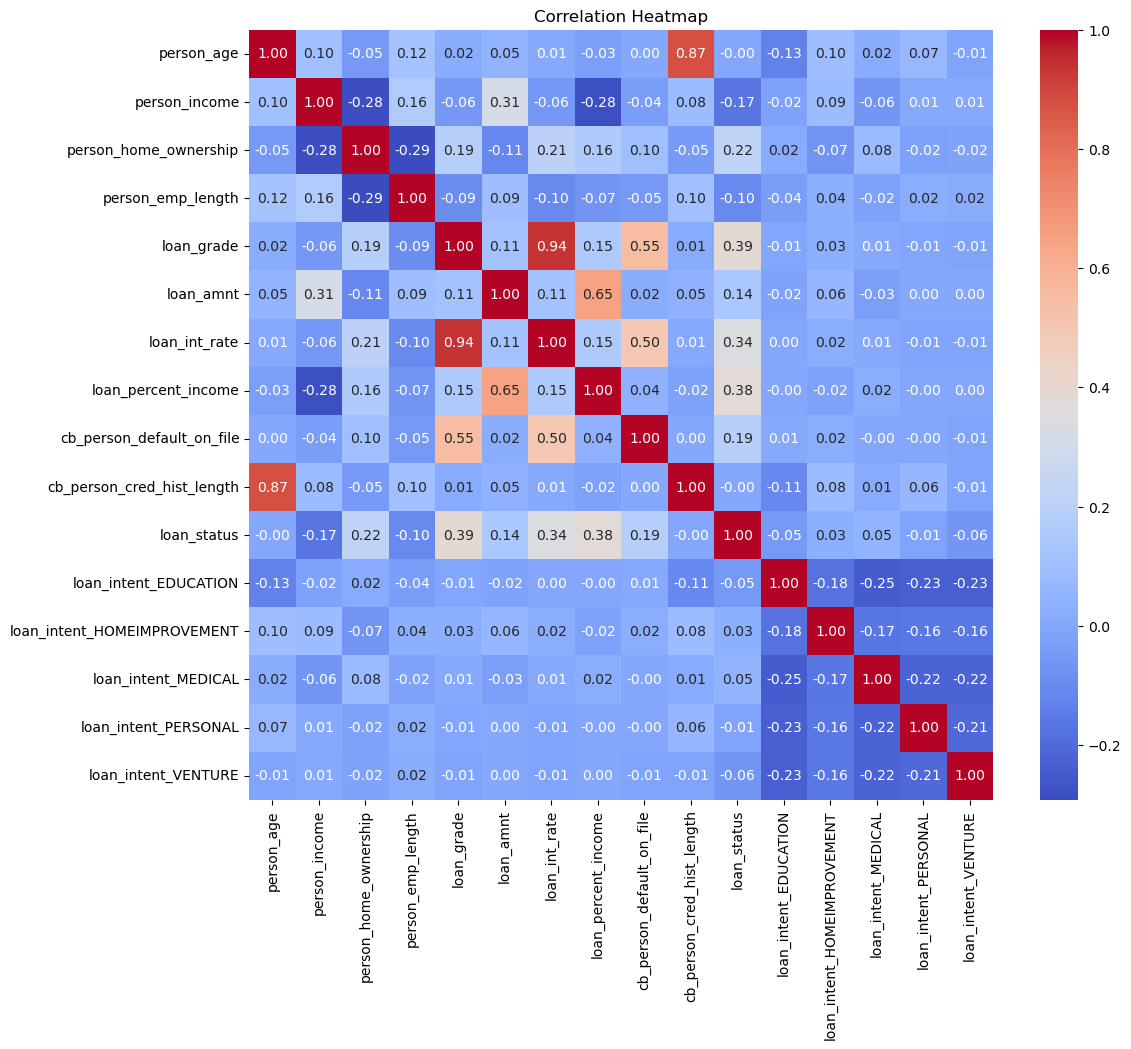

In [8]:
correlation = train_processed.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')

plt.show()

In [24]:
print(train_processed.columns)
print(test_processed.columns)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')
Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')


## Feature Engineering

In [25]:
import numpy as np
def feature_engineering(df):
    df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']
    df['financial_burden'] = df['loan_amnt'] * df['loan_int_rate']
    df['income_per_year_emp'] = df['person_income'] / df['person_emp_length'].replace(0, np.nan)
    df['int_to_loan_ratio'] = df['loan_int_rate'] / df['loan_amnt'].replace(0, np.nan)
    df['loan_int_emp_interaction'] = df['loan_int_rate'] * df['person_emp_length']
    df['debt_to_credit_ratio'] = df['loan_amnt'] / df['cb_person_cred_hist_length'].replace(0, np.nan)
    df['int_to_cred_hist'] = df['loan_int_rate'] / df['cb_person_cred_hist_length'].replace(0, np.nan)
    df['int_per_year_emp'] = df['loan_int_rate'] / df['person_emp_length'].replace(0, np.nan)
    df['loan_amt_per_emp_year'] = df['loan_amnt'] / df['person_emp_length'].replace(0, np.nan)
    df['income_to_loan_ratio'] = df['person_income'] / df['loan_amnt'].replace(0, np.nan)

    df['income_bin'] = pd.qcut(df['person_income'], 5, labels=False)
    df['rate_bin'] = pd.qcut(df['loan_int_rate'], 5, labels=False)
    df['person_emp_length'] = df['person_emp_length'].astype(int)
    df['loan_grade'] = df['loan_grade'].replace({'F': 'E', 'G': 'E'})

    df['loan_to_income'] = np.round(df['loan_amnt'] / df['person_income'], 2)
    df['total_amount_payable'] = np.floor(df['loan_amnt'] * (1 + df['loan_int_rate'] / 100))
    df['interest'] = np.floor(df['loan_amnt'] * df['loan_int_rate'] / 100)
    df['amt_payable_to_income'] = np.round(df['total_amount_payable'] / df['person_income'], 2)

    df['loan_percent_error'] = np.round(df['loan_to_income'] - df['loan_percent_income'], 2)
    df['income_2'] = np.floor(df['loan_amnt'] / df['loan_percent_income'])
    df['amt_payable_to_income_2'] = np.round(df['total_amount_payable'] / df['income_2'], 2)

    df['credit_hist_vs_age'] = np.round(df['cb_person_cred_hist_length'] / df['person_age'], 2)
    df['credit_hist_vs_work'] = np.round(df['person_emp_length'] / df['cb_person_cred_hist_length'], 2)
    df['income_vs_age'] = np.round(df['person_income'] / df['person_age'], 2)
    df['work_vs_age'] = np.round(df['person_emp_length'] / df['person_age'], 2)

    df['risk_flag'] = np.where(
        (df['cb_person_default_on_file'] == 'Y') & (df['loan_grade'].isin(['D', 'E'])),
        1,
        0
    )
    df['ratio1'] = np.round(
        (df['total_amount_payable'] / df['person_income']) * (df['person_emp_length'] / df['person_age']),
        2
    )
    df['ratio2'] = np.floor(
        (df['person_emp_length'] / df['person_age']) * df['person_income']
    )

    df['grade_home_interaction'] = (
        df['person_home_ownership'].astype(str) + '_' + df['loan_grade'].astype(str)
    )

    return df

train_processed = feature_engineering(train_processed)
test_processed = feature_engineering(test_processed)

train_processed.replace([np.inf, -np.inf], np.nan, inplace=True)
test_processed.replace([np.inf, -np.inf], np.nan, inplace=True)

In [26]:
train_processed.describe()

person_age  person_income  person_home_ownership  person_emp_length  \
count  58643.000000   5.864300e+04           58643.000000       58643.000000   
mean      27.550961   6.404405e+04               1.673635           4.696980   
std        6.033258   3.792807e+04               1.452526           3.899118   
min       20.000000   4.200000e+03               0.000000           0.000000   
25%       23.000000   4.200000e+04               0.000000           2.000000   
50%       26.000000   5.800000e+04               3.000000           4.000000   
75%       30.000000   7.560000e+04               3.000000           7.000000   
max      123.000000   1.900000e+06               3.000000          41.000000   

         loan_grade     loan_amnt  loan_int_rate  loan_percent_income  \
count  58643.000000  58643.000000   58643.000000         58643.000000   
mean       1.066606   9217.103525      10.677771             0.159235   
std        1.046169   5563.342345       3.034669             0.091690   
min        0.000000    500.000000       5.420000             0.000000   
25%        0.000000   5000.000000       7.880000             0.090000   
50%        1.000000   8000.000000      10.750000             0.140000   
75%        2.000000  12000.000000      12.990000             0.210000   
max        6.000000  35000.000000      23.220000             0.830000   

       cb_person_default_on_file  cb_person_cred_hist_length  ...  \
count               58643.000000                58643.000000  ...   
mean                    0.148372                    5.813618  ...   
std                     0.355472                    4.029234  ...   
min                     0.000000                    2.000000  ...   
25%                     0.000000                    3.000000  ...   
50%                     0.000000                    4.000000  ...   
75%                     0.000000                    8.000000  ...   
max                     1.000000                   30.000000  ...   

       loan_percent_error      income_2  amt_payable_to_income_2  \
count        58643.000000  5.864100e+04             58643.000000   
mean             0.000470  6.424720e+04                 0.176655   
std              0.023049  3.663539e+04                 0.102814   
min             -0.540000  3.750000e+03                 0.000000   
25%              0.000000  4.166600e+04                 0.100000   
50%              0.000000  5.833300e+04                 0.160000   
75%              0.000000  7.692300e+04                 0.230000   
max              2.810000  1.300000e+06                 0.920000   

       credit_hist_vs_age  credit_hist_vs_work  income_vs_age   work_vs_age  \
count        58643.000000         58643.000000   58643.000000  58643.000000   
mean             0.196525             1.126482    2382.198357      0.172887   
std              0.094490             1.062091    1395.219228      0.134057   
min              0.030000             0.000000     168.000000      0.000000   
25%              0.120000             0.290000    1555.560000      0.060000   
50%              0.170000             0.800000    2142.860000      0.140000   
75%              0.270000             1.670000    2909.090000      0.270000   
max              1.040000            13.000000   86363.640000      0.950000   

       risk_flag        ratio1         ratio2  
count    58643.0  58643.000000   58643.000000  
mean         0.0      0.029775   11824.430623  
std          0.0      0.031372   13607.565814  
min          0.0      0.000000       0.000000  
25%          0.0      0.010000    3000.000000  
50%          0.0      0.020000    8181.000000  
75%          0.0      0.040000   16666.000000  
max          0.0      0.760000  600000.000000  

[8 rows x 37 columns]

In [27]:
test_processed.describe()

person_age  person_income  person_home_ownership  person_emp_length  \
count  39098.000000   3.909800e+04           39098.000000       39098.000000   
mean      27.566781   6.406046e+04               1.663282           4.687068   
std        6.032761   3.795583e+04               1.454022           3.868395   
min       20.000000   4.000000e+03               0.000000           0.000000   
25%       23.000000   4.200000e+04               0.000000           2.000000   
50%       26.000000   5.800000e+04               3.000000           4.000000   
75%       30.000000   7.588500e+04               3.000000           7.000000   
max       94.000000   1.900000e+06               3.000000          42.000000   

         loan_grade     loan_amnt  loan_int_rate  loan_percent_income  \
count  39098.000000  39098.000000   39098.000000         39098.000000   
mean       1.061742   9251.466188      10.661216             0.159573   
std        1.039602   5576.254680       3.020220             0.091633   
min        0.000000    700.000000       5.420000             0.000000   
25%        0.000000   5000.000000       7.880000             0.090000   
50%        1.000000   8000.000000      10.750000             0.140000   
75%        2.000000  12000.000000      12.990000             0.210000   
max        6.000000  35000.000000      22.110000             0.730000   

       cb_person_default_on_file  cb_person_cred_hist_length  ...  \
count               39098.000000                39098.000000  ...   
mean                    0.150161                    5.830707  ...   
std                     0.357234                    4.072157  ...   
min                     0.000000                    2.000000  ...   
25%                     0.000000                    3.000000  ...   
50%                     0.000000                    4.000000  ...   
75%                     0.000000                    8.000000  ...   
max                     1.000000                   30.000000  ...   

       loan_percent_error      income_2  amt_payable_to_income_2  \
count        39098.000000  3.909400e+04             39098.000000   
mean             0.000612  6.421898e+04                 0.177042   
std              0.028260  3.704801e+04                 0.102783   
min             -0.470000  5.660000e+03                 0.000000   
25%              0.000000  4.173900e+04                 0.100000   
50%              0.000000  5.833300e+04                 0.160000   
75%              0.000000  7.692300e+04                 0.230000   
max              2.810000  1.200000e+06                 0.840000   

       credit_hist_vs_age  credit_hist_vs_work  income_vs_age   work_vs_age  \
count        39098.000000         39098.000000   39098.000000  39098.000000   
mean             0.196849             1.125682    2382.351786      0.172588   
std              0.095262             1.061209    1377.474256      0.133763   
min              0.040000             0.000000     100.000000      0.000000   
25%              0.120000             0.290000    1551.720000      0.060000   
50%              0.170000             0.800000    2142.860000      0.140000   
75%              0.270000             1.670000    2903.230000      0.270000   
max              0.670000            14.000000   70370.370000      0.940000   

       risk_flag        ratio1         ratio2  
count    39098.0  39098.000000   39098.000000  
mean         0.0      0.029870   11849.230523  
std          0.0      0.032698   13856.790431  
min          0.0      0.000000       0.000000  
25%          0.0      0.010000    3010.250000  
50%          0.0      0.020000    8181.000000  
75%          0.0      0.040000   16666.000000  
max          0.0      1.750000  702000.000000  

[8 rows x 36 columns]

In [28]:
# all object columns tranformed to categorical columns
for column in train_processed.select_dtypes(include=['object']).columns:
    train_processed[column] = train_processed[column].astype('category')
for column in test_processed.select_dtypes(include=['object']).columns:
    test_processed[column] = test_processed[column].astype('category')

## Modeling

In [30]:
from sklearn.model_selection import train_test_split    

X = train_processed.drop('loan_status', axis=1)
y = train_processed['loan_status']


## Backward Feature Elimination

In [31]:
from lightgbm import LGBMClassifier 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:

lgbm = LGBMClassifier(n_estimators=1000, random_state=42, n_jobs=-1)

lgbm.fit(X_train, y_train)

print('Validation roc_auc:', roc_auc_score(y_val, lgbm.predict_proba(X_val)[:, 1]))

[LightGBM] [Info] Number of positive: 6725, number of negative: 40189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5229
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143347 -> initscore=-1.787761
[LightGBM] [Info] Start training from score -1.787761
Training roc_auc: 0.9999973471074082
Validation roc_auc: 0.954335024118675


In [34]:
from sklearn.model_selection import StratifiedKFold

cv_strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

bfs = SFS(
    estimator=lgbm,
    k_features=(10, 35),
    forward=False,
    floating=True,
    scoring='roc_auc',
    cv=cv_strat,
    n_jobs=-1,
    verbose=2
)

bfs = bfs.fit(X_train, y_train)

selected_features = list(bfs.k_feature_names_)

print(selected_features)


c:\Users\Stefan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5380, number of negative: 32151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5202
[LightGBM] [Info] Number of data points in the train set: 37531, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143348 -> initscore=-1.787755
[LightGBM] [Info] Start training from score -1.787755
[LightGBM] [Info] Number of positive: 5380, number of negative: 32151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5206
[LightGBM] [Info] Number of data points in the train set: 37531, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143348 -> initscore=-1.787755
[LightGBM] [Info] Start training from score -1.787755
[LightGBM] [In

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  8.0min finished

[2024-10-31 11:58:17] Features: 41/10 -- score: 0.9491799388388718[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  39 out of  41 | elapsed:  7.5min remaining:   22.9s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:  7.5min finished

[2024-10-31 12:05:47] Features: 40/10 -- score: 0.9491799388388718[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:  7.4min remaining:   23.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent worker

['person_age', 'person_income', 'loan_grade', 'loan_int_rate', 'loan_percent_income', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_to_income_ratio', 'loan_int_emp_interaction', 'loan_amt_per_emp_year', 'income_bin', 'total_amount_payable', 'interest', 'loan_percent_error', 'income_2', 'credit_hist_vs_age', 'ratio1', 'ratio2', 'grade_home_interaction']


[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:  2.5min finished

[2024-10-31 16:28:59] Features: 10/10 -- score: 0.9478121358086289

In [37]:
print(len(selected_features))

22


In [38]:

X_train = X_train[selected_features]

X_val = X_val[selected_features]

lgbm = LGBMClassifier(n_estimators=1000, random_state=42, n_jobs=-1)

lgbm.fit(X_train, y_train)

y_pred_proba = lgbm.predict_proba(X_val)[:, 1]

roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f'Validation ROC AUC: {roc_auc:.4f}')

[LightGBM] [Info] Number of positive: 6725, number of negative: 40189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2525
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143347 -> initscore=-1.787761
[LightGBM] [Info] Start training from score -1.787761
Validation ROC AUC: 0.9541


In [39]:
import optuna
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


<frozen importlib._bootstrap>:488: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [40]:
X.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_to_income_ratio',
       'financial_burden', 'income_per_year_emp', 'int_to_loan_ratio',
       'loan_int_emp_interaction', 'debt_to_credit_ratio', 'int_to_cred_hist',
       'int_per_year_emp', 'loan_amt_per_emp_year', 'income_to_loan_ratio',
       'income_bin', 'rate_bin', 'loan_to_income', 'total_amount_payable',
       'interest', 'amt_payable_to_income', 'loan_percent_error', 'income_2',
       'amt_payable_to_income_2', 'credit_hist_vs_age', 'credit_hist_vs_work',
       'income_vs_age', 'work_vs_age', 'risk_flag', 'ratio1', 'ratio2',
       'grade_home_interaction'],
      dtype='object')

In [41]:
X = X[selected_features]

In [42]:
X.columns

Index(['person_age', 'person_income', 'loan_grade', 'loan_int_rate',
       'loan_percent_income', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_to_income_ratio',
       'loan_int_emp_interaction', 'loan_amt_per_emp_year', 'income_bin',
       'total_amount_payable', 'interest', 'loan_percent_error', 'income_2',
       'credit_hist_vs_age', 'ratio1', 'ratio2', 'grade_home_interaction'],
      dtype='object')

In [44]:
def objective_lgb(trial):
    lgbm_params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 256),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 200),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'bagging_freq' : trial.suggest_int('bagging_freq', 1, 3),
        'is_unbalance' : trial.suggest_categorical('is_unbalance', ["+", "-"]),
    }

    model = LGBMClassifier(**lgbm_params, random_state=42, n_jobs=-1, objective = 'binary', metric='auc')

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []
    for train_idx, val_idx in skf.split(X, y):
        X_train_fold, y_train_fold = X.iloc[train_idx], y.iloc[train_idx]
        X_val_fold, y_val_fold = X.iloc[val_idx], y.iloc[val_idx]
        model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)])
        y_pred = model.predict_proba(X_val_fold)[:, 1]
        auc = roc_auc_score(y_val_fold, y_pred)
        auc_scores.append(auc)
    print(f"Mean AUC: {np.mean(auc_scores)}")
    return np.mean(auc_scores)

study_lgb = optuna.create_study(direction='maximize')

study_lgb.optimize(objective_lgb, n_trials=50)

[I 2024-10-31 17:57:51,420] A new study created in memory with name: no-name-1a459e35-598f-4e35-9aee-b954effa1fa7


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-10-31 17:57:58,504] Trial 0 finished with value: 0.952552095233289 and parameters: {'n_estimators': 637, 'learning_rate': 0.030612422024542146, 'num_leaves': 53, 'max_depth': 4, 'min_child_samples': 23, 'subsample': 0.9638099920935772, 'colsample_bytree': 0.5364148352664094, 'reg_alpha': 5.20102438445941, 'reg_lambda': 6.451860322523731, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 0 with value: 0.952552095233289.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-31 17:58:02,452] Trial 1 finished with value: 0.9443418056559004 and parameters: {'n_estimators': 437, 'learning_rate': 0.031234229647846702, 'num_leaves': 37, 'max_depth': 3, 'min_child_samples': 105, 'subsample': 0.6588337281158345, 'colsample_bytree': 0.9664262934218147, 'reg_alpha': 0.22337366693576777, 'reg_lambda': 7.6013943315335535, 'bagging_freq': 3, 'is_unbalance': '-'}. Best is trial 0 with value: 0.952552095233289.


Mean AUC: 0.9443418056559004
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[I 2024-10-31 17:58:24,880] Trial 2 finished with value: 0.9481185980549416 and parameters: {'n_estimators': 740, 'learning_rate': 0.1759029280708631, 'num_leaves': 137, 'max_depth': 9, 'min_child_samples': 23, 'subsample': 0.9017513510050528, 'colsample_bytree': 0.8844033163242061, 'reg_alpha': 1.7577238743223123, 'reg_lambda': 9.591592598837007, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 0 with value: 0.952552095233289.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Mean AUC: 0.9481185980549416
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with po

[I 2024-10-31 17:58:37,732] Trial 3 finished with value: 0.9469818521884111 and parameters: {'n_estimators': 492, 'learning_rate': 0.2550016388854669, 'num_leaves': 112, 'max_depth': 10, 'min_child_samples': 11, 'subsample': 0.8652119218180203, 'colsample_bytree': 0.8815783538286589, 'reg_alpha': 7.673224039163964, 'reg_lambda': 0.5910751734125508, 'bagging_freq': 1, 'is_unbalance': '+'}. Best is trial 0 with value: 0.952552095233289.


Mean AUC: 0.9469818521884111
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[I 2024-10-31 17:58:50,091] Trial 4 finished with value: 0.9449110063868954 and parameters: {'n_estimators': 705, 'learning_rate': 0.24052027019911268, 'num_leaves': 39, 'max_depth': 7, 'min_child_samples': 167, 'subsample': 0.5237392816957875, 'colsample_bytree': 0.7595952254488957, 'reg_alpha': 8.976044767674361, 'reg_lambda': 0.571315602567265, 'bagging_freq': 2, 'is_unbalance': '+'}. Best is trial 0 with value: 0.952552095233289.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Mean AUC: 0.9449110063868954
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with po

[I 2024-10-31 17:59:08,557] Trial 5 finished with value: 0.9471322568391424 and parameters: {'n_estimators': 933, 'learning_rate': 0.28761284020257594, 'num_leaves': 155, 'max_depth': 6, 'min_child_samples': 77, 'subsample': 0.9539028690787225, 'colsample_bytree': 0.8830083863084981, 'reg_alpha': 1.1257985089930322, 'reg_lambda': 8.452020757686618, 'bagging_freq': 3, 'is_unbalance': '+'}. Best is trial 0 with value: 0.952552095233289.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
Mean AUC: 0.9471322568391424
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with po

[I 2024-10-31 17:59:11,069] Trial 6 finished with value: 0.9552524336651418 and parameters: {'n_estimators': 173, 'learning_rate': 0.20791596970601517, 'num_leaves': 206, 'max_depth': 4, 'min_child_samples': 32, 'subsample': 0.8474664763505866, 'colsample_bytree': 0.8359156703445234, 'reg_alpha': 6.21298776990185, 'reg_lambda': 5.648947549900068, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 6 with value: 0.9552524336651418.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Mean AUC: 0.9552524336651418
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threa

[I 2024-10-31 17:59:21,129] Trial 7 finished with value: 0.9520141042973534 and parameters: {'n_estimators': 808, 'learning_rate': 0.21704588876033315, 'num_leaves': 155, 'max_depth': 4, 'min_child_samples': 35, 'subsample': 0.9072083465775738, 'colsample_bytree': 0.7945724345469645, 'reg_alpha': 0.40140418222233354, 'reg_lambda': 0.3300613683871667, 'bagging_freq': 3, 'is_unbalance': '-'}. Best is trial 6 with value: 0.9552524336651418.


Mean AUC: 0.9520141042973534
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[I 2024-10-31 17:59:34,080] Trial 8 finished with value: 0.9505913104678918 and parameters: {'n_estimators': 633, 'learning_rate': 0.1480019571188802, 'num_leaves': 88, 'max_depth': 8, 'min_child_samples': 177, 'subsample': 0.7139278878157274, 'colsample_bytree': 0.9152236487111229, 'reg_alpha': 7.414320684230522, 'reg_lambda': 9.869071570518244, 'bagging_freq': 3, 'is_unbalance': '-'}. Best is trial 6 with value: 0.9552524336651418.


Mean AUC: 0.9505913104678918
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[I 2024-10-31 17:59:47,720] Trial 9 finished with value: 0.951464634549281 and parameters: {'n_estimators': 687, 'learning_rate': 0.1267025992466428, 'num_leaves': 174, 'max_depth': 8, 'min_child_samples': 146, 'subsample': 0.7603938944636254, 'colsample_bytree': 0.8120521045344866, 'reg_alpha': 7.4667468454019055, 'reg_lambda': 6.0172424011469445, 'bagging_freq': 1, 'is_unbalance': '-'}. Best is trial 6 with value: 0.9552524336651418.


Mean AUC: 0.951464634549281
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2024-10-31 17:59:49,434] Trial 10 finished with value: 0.9520092872967633 and parameters: {'n_estimators': 106, 'learning_rate': 0.0956613884881021, 'num_leaves': 250, 'max_depth': 5, 'min_child_samples': 70, 'subsample': 0.8194219804118297, 'colsample_bytree': 0.6172769328388377, 'reg_alpha': 4.042778007986092, 'reg_lambda': 3.139430603802344, 'bagging_freq': 1, 'is_unbalance': '+'}. Best is trial 6 with value: 0.9552524336651418.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Mean AUC: 0.9520092872967633
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001797 seconds.
You can set `force_col_

[I 2024-10-31 17:59:52,606] Trial 11 finished with value: 0.9339502492960824 and parameters: {'n_estimators': 276, 'learning_rate': 0.02427292641528791, 'num_leaves': 221, 'max_depth': 3, 'min_child_samples': 67, 'subsample': 0.9893356690163756, 'colsample_bytree': 0.504033582166145, 'reg_alpha': 5.319880406468539, 'reg_lambda': 4.762584014819485, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 6 with value: 0.9552524336651418.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-31 17:59:56,522] Trial 12 finished with value: 0.9557163028477522 and parameters: {'n_estimators': 265, 'learning_rate': 0.09230890375450382, 'num_leaves': 205, 'max_depth': 5, 'min_child_samples': 51, 'subsample': 0.8260161096620791, 'colsample_bytree': 0.6572308162386888, 'reg_alpha': 4.8738838104859274, 'reg_lambda': 4.788676326904688, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 12 with value: 0.9557163028477522.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-31 17:59:58,484] Trial 13 finished with value: 0.9488226407137752 and parameters: {'n_estimators': 106, 'learning_rate': 0.0874516233964324, 'num_leaves': 199, 'max_depth': 5, 'min_child_samples': 54, 'subsample': 0.8035752286163553, 'colsample_bytree': 0.6670105961034865, 'reg_alpha': 3.513185920885073, 'reg_lambda': 3.6156904103084493, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 12 with value: 0.9557163028477522.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-31 18:00:03,441] Trial 14 finished with value: 0.9528050251142874 and parameters: {'n_estimators': 295, 'learning_rate': 0.18566688032325226, 'num_leaves': 254, 'max_depth': 6, 'min_child_samples': 101, 'subsample': 0.65666874565756, 'colsample_bytree': 0.6787218132094143, 'reg_alpha': 6.396196219956696, 'reg_lambda': 2.7006112736628145, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 12 with value: 0.9557163028477522.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Mean AUC: 0.9528050251142874
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used f

[I 2024-10-31 18:00:06,970] Trial 15 finished with value: 0.955422709596507 and parameters: {'n_estimators': 274, 'learning_rate': 0.08189160127920483, 'num_leaves': 205, 'max_depth': 5, 'min_child_samples': 130, 'subsample': 0.835884906361074, 'colsample_bytree': 0.6996667818738797, 'reg_alpha': 2.9728227389510966, 'reg_lambda': 4.733280200037118, 'bagging_freq': 1, 'is_unbalance': '-'}. Best is trial 12 with value: 0.9557163028477522.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Mean AUC: 0.955422709596507
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightG

[I 2024-10-31 18:00:11,866] Trial 16 finished with value: 0.9555632936868743 and parameters: {'n_estimators': 370, 'learning_rate': 0.07420825677500041, 'num_leaves': 186, 'max_depth': 5, 'min_child_samples': 139, 'subsample': 0.7622502435395966, 'colsample_bytree': 0.7012067662082281, 'reg_alpha': 2.6268073847748132, 'reg_lambda': 4.3104202871324775, 'bagging_freq': 1, 'is_unbalance': '-'}. Best is trial 12 with value: 0.9557163028477522.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-31 18:00:17,463] Trial 17 finished with value: 0.9554355728713473 and parameters: {'n_estimators': 403, 'learning_rate': 0.06094415733203462, 'num_leaves': 178, 'max_depth': 6, 'min_child_samples': 200, 'subsample': 0.730753790336885, 'colsample_bytree': 0.6039308800929202, 'reg_alpha': 2.172621165162085, 'reg_lambda': 3.9379409151694658, 'bagging_freq': 1, 'is_unbalance': '-'}. Best is trial 12 with value: 0.9557163028477522.


Mean AUC: 0.9554355728713473
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001786 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[I 2024-10-31 18:00:23,892] Trial 18 finished with value: 0.9508519408757353 and parameters: {'n_estimators': 388, 'learning_rate': 0.12250952153252784, 'num_leaves': 119, 'max_depth': 7, 'min_child_samples': 106, 'subsample': 0.5319275281645909, 'colsample_bytree': 0.5989855700021649, 'reg_alpha': 4.131635428805286, 'reg_lambda': 1.9561200187868262, 'bagging_freq': 1, 'is_unbalance': '+'}. Best is trial 12 with value: 0.9557163028477522.


Mean AUC: 0.9508519408757353
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[I 2024-10-31 18:00:30,466] Trial 19 finished with value: 0.9550239568809857 and parameters: {'n_estimators': 517, 'learning_rate': 0.05900073062446438, 'num_leaves': 228, 'max_depth': 5, 'min_child_samples': 133, 'subsample': 0.6237613463609015, 'colsample_bytree': 0.7240079569894544, 'reg_alpha': 2.5906399687989956, 'reg_lambda': 2.244654842859118, 'bagging_freq': 1, 'is_unbalance': '-'}. Best is trial 12 with value: 0.9557163028477522.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-31 18:00:34,980] Trial 20 finished with value: 0.9533939193385402 and parameters: {'n_estimators': 335, 'learning_rate': 0.11977556221125829, 'num_leaves': 179, 'max_depth': 4, 'min_child_samples': 89, 'subsample': 0.7717663324652843, 'colsample_bytree': 0.7556516539407365, 'reg_alpha': 9.598809631795945, 'reg_lambda': 7.4070382875172225, 'bagging_freq': 3, 'is_unbalance': '-'}. Best is trial 12 with value: 0.9557163028477522.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-31 18:00:40,965] Trial 21 finished with value: 0.9556145196640442 and parameters: {'n_estimators': 408, 'learning_rate': 0.06485370901602974, 'num_leaves': 187, 'max_depth': 6, 'min_child_samples': 183, 'subsample': 0.7150837093933731, 'colsample_bytree': 0.6281974559724186, 'reg_alpha': 1.8614544561971857, 'reg_lambda': 4.177040281860084, 'bagging_freq': 1, 'is_unbalance': '-'}. Best is trial 12 with value: 0.9557163028477522.


Mean AUC: 0.9556145196640442
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[I 2024-10-31 18:00:44,395] Trial 22 finished with value: 0.9532103154659133 and parameters: {'n_estimators': 205, 'learning_rate': 0.0609908096389445, 'num_leaves': 230, 'max_depth': 7, 'min_child_samples': 167, 'subsample': 0.6950857879595808, 'colsample_bytree': 0.6421855720857478, 'reg_alpha': 1.6283666715953191, 'reg_lambda': 3.9992750020918963, 'bagging_freq': 1, 'is_unbalance': '-'}. Best is trial 12 with value: 0.9557163028477522.


Mean AUC: 0.9532103154659133
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[I 2024-10-31 18:00:50,945] Trial 23 finished with value: 0.9530270777898598 and parameters: {'n_estimators': 459, 'learning_rate': 0.10068100783469314, 'num_leaves': 188, 'max_depth': 6, 'min_child_samples': 196, 'subsample': 0.583141982837059, 'colsample_bytree': 0.5825745510263592, 'reg_alpha': 3.2051162998898866, 'reg_lambda': 5.355942254567426, 'bagging_freq': 1, 'is_unbalance': '-'}. Best is trial 12 with value: 0.9557163028477522.


Mean AUC: 0.9530270777898598
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[I 2024-10-31 18:00:58,239] Trial 24 finished with value: 0.9555346721230601 and parameters: {'n_estimators': 575, 'learning_rate': 0.053870623634709125, 'num_leaves': 157, 'max_depth': 5, 'min_child_samples': 147, 'subsample': 0.7980708883570815, 'colsample_bytree': 0.5556692731428738, 'reg_alpha': 4.450136123237135, 'reg_lambda': 4.745083466471193, 'bagging_freq': 1, 'is_unbalance': '-'}. Best is trial 12 with value: 0.9557163028477522.


Mean AUC: 0.9555346721230601
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[I 2024-10-31 18:01:05,027] Trial 25 finished with value: 0.9487572777194764 and parameters: {'n_estimators': 365, 'learning_rate': 0.014103033104124349, 'num_leaves': 214, 'max_depth': 8, 'min_child_samples': 126, 'subsample': 0.6862202614095194, 'colsample_bytree': 0.6524376983676756, 'reg_alpha': 1.0891761435511078, 'reg_lambda': 1.4182582777163821, 'bagging_freq': 1, 'is_unbalance': '-'}. Best is trial 12 with value: 0.9557163028477522.


Mean AUC: 0.9487572777194764
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[I 2024-10-31 18:01:08,440] Trial 26 finished with value: 0.9552092855146626 and parameters: {'n_estimators': 192, 'learning_rate': 0.1377679635518801, 'num_leaves': 190, 'max_depth': 6, 'min_child_samples': 183, 'subsample': 0.7576837638718947, 'colsample_bytree': 0.7088537582009142, 'reg_alpha': 5.893384273397847, 'reg_lambda': 6.357571290185575, 'bagging_freq': 2, 'is_unbalance': '+'}. Best is trial 12 with value: 0.9557163028477522.


Mean AUC: 0.9552092855146626
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[I 2024-10-31 18:01:11,288] Trial 27 finished with value: 0.9529903592356221 and parameters: {'n_estimators': 240, 'learning_rate': 0.0785424864102969, 'num_leaves': 164, 'max_depth': 4, 'min_child_samples': 151, 'subsample': 0.9003615839926887, 'colsample_bytree': 0.6371613135044958, 'reg_alpha': 2.268095260404176, 'reg_lambda': 3.973671549363862, 'bagging_freq': 1, 'is_unbalance': '-'}. Best is trial 12 with value: 0.9557163028477522.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Mean AUC: 0.9529903592356221
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[Light

[I 2024-10-31 18:01:16,400] Trial 28 finished with value: 0.9559921835568019 and parameters: {'n_estimators': 338, 'learning_rate': 0.11023376956970997, 'num_leaves': 240, 'max_depth': 5, 'min_child_samples': 119, 'subsample': 0.783419650623638, 'colsample_bytree': 0.73454439893084, 'reg_alpha': 3.426967712375418, 'reg_lambda': 3.144289058015768, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 28 with value: 0.9559921835568019.


Mean AUC: 0.9559921835568019
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[I 2024-10-31 18:01:22,734] Trial 29 finished with value: 0.9539511281474388 and parameters: {'n_estimators': 605, 'learning_rate': 0.10888761563914669, 'num_leaves': 247, 'max_depth': 3, 'min_child_samples': 56, 'subsample': 0.6154608347475774, 'colsample_bytree': 0.5448529945002083, 'reg_alpha': 4.813795545681976, 'reg_lambda': 3.0085364049178622, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 28 with value: 0.9559921835568019.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-31 18:01:29,321] Trial 30 finished with value: 0.9536027427125354 and parameters: {'n_estimators': 315, 'learning_rate': 0.16225322540017242, 'num_leaves': 235, 'max_depth': 7, 'min_child_samples': 119, 'subsample': 0.8736150731560335, 'colsample_bytree': 0.7868731137488479, 'reg_alpha': 3.8605465474418033, 'reg_lambda': 7.19416567927378, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 28 with value: 0.9559921835568019.


Mean AUC: 0.9536027427125354
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[I 2024-10-31 18:01:34,818] Trial 31 finished with value: 0.9520132830109326 and parameters: {'n_estimators': 398, 'learning_rate': 0.034350181769522724, 'num_leaves': 196, 'max_depth': 5, 'min_child_samples': 119, 'subsample': 0.7963050085420174, 'colsample_bytree': 0.7328779875853775, 'reg_alpha': 5.260471153410803, 'reg_lambda': 4.233755087715218, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 28 with value: 0.9559921835568019.


Mean AUC: 0.9520132830109326
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[I 2024-10-31 18:01:41,226] Trial 32 finished with value: 0.9549524920300637 and parameters: {'n_estimators': 451, 'learning_rate': 0.04226234034546897, 'num_leaves': 214, 'max_depth': 5, 'min_child_samples': 97, 'subsample': 0.7343002470699326, 'colsample_bytree': 0.6827175055251361, 'reg_alpha': 2.907464007110162, 'reg_lambda': 3.3725833899949036, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 28 with value: 0.9559921835568019.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Mean AUC: 0.9549524920300637
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with po

[I 2024-10-31 18:01:46,650] Trial 33 finished with value: 0.9558444074159415 and parameters: {'n_estimators': 353, 'learning_rate': 0.07662362065668042, 'num_leaves': 134, 'max_depth': 6, 'min_child_samples': 159, 'subsample': 0.7696881853950741, 'colsample_bytree': 0.5696426807097682, 'reg_alpha': 1.273721091639132, 'reg_lambda': 5.324743656322916, 'bagging_freq': 3, 'is_unbalance': '-'}. Best is trial 28 with value: 0.9559921835568019.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
Mean AUC: 0.9558444074159415
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 6679, num

[I 2024-10-31 18:01:54,629] Trial 34 finished with value: 0.9544209925305669 and parameters: {'n_estimators': 535, 'learning_rate': 0.10611094880463577, 'num_leaves': 73, 'max_depth': 6, 'min_child_samples': 162, 'subsample': 0.6941214139659071, 'colsample_bytree': 0.5092496954055279, 'reg_alpha': 0.17097216132231252, 'reg_lambda': 5.376210200412997, 'bagging_freq': 3, 'is_unbalance': '-'}. Best is trial 28 with value: 0.9559921835568019.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
Mean AUC: 0.9544209925305669
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001830 seconds.
You can set `force_col_

[I 2024-10-31 18:02:02,363] Trial 35 finished with value: 0.95309665773941 and parameters: {'n_estimators': 458, 'learning_rate': 0.13638563435412215, 'num_leaves': 139, 'max_depth': 7, 'min_child_samples': 189, 'subsample': 0.7890320680920628, 'colsample_bytree': 0.5718140660374657, 'reg_alpha': 1.0283062395724194, 'reg_lambda': 6.62082217420722, 'bagging_freq': 3, 'is_unbalance': '-'}. Best is trial 28 with value: 0.9559921835568019.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
Mean AUC: 0.95309665773941
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with posi

[I 2024-10-31 18:02:10,377] Trial 36 finished with value: 0.9510103910200588 and parameters: {'n_estimators': 330, 'learning_rate': 0.1598507321096802, 'num_leaves': 127, 'max_depth': 10, 'min_child_samples': 157, 'subsample': 0.8709214388666981, 'colsample_bytree': 0.6244010917025232, 'reg_alpha': 1.8724214839018776, 'reg_lambda': 8.321526528906881, 'bagging_freq': 3, 'is_unbalance': '+'}. Best is trial 28 with value: 0.9559921835568019.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-10-31 18:02:14,184] Trial 37 finished with value: 0.9524077260515318 and parameters: {'n_estimators': 241, 'learning_rate': 0.041658777105135006, 'num_leaves': 101, 'max_depth': 6, 'min_child_samples': 171, 'subsample': 0.6540002561771372, 'colsample_bytree': 0.993333740617379, 'reg_alpha': 1.4893543179041002, 'reg_lambda': 1.3068418179668158, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 28 with value: 0.9559921835568019.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Mean AUC: 0.9524077260515318
[LightGBM] [Warning] bagging_freq is s

[I 2024-10-31 18:02:16,526] Trial 38 finished with value: 0.9491410137619107 and parameters: {'n_estimators': 150, 'learning_rate': 0.07607925607481292, 'num_leaves': 140, 'max_depth': 4, 'min_child_samples': 83, 'subsample': 0.9398252737994485, 'colsample_bytree': 0.5362345274527955, 'reg_alpha': 3.525440465113607, 'reg_lambda': 2.508891181445898, 'bagging_freq': 3, 'is_unbalance': '+'}. Best is trial 28 with value: 0.9559921835568019.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-31 18:02:24,999] Trial 39 finished with value: 0.9562326621211976 and parameters: {'n_estimators': 489, 'learning_rate': 0.10937483424557365, 'num_leaves': 25, 'max_depth': 9, 'min_child_samples': 10, 'subsample': 0.8319990598719775, 'colsample_bytree': 0.5875004549300303, 'reg_alpha': 0.7745434414081129, 'reg_lambda': 5.789490110136509, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 39 with value: 0.9562326621211976.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Mean AUC: 0.9562326621211976
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with po

[I 2024-10-31 18:02:43,054] Trial 40 finished with value: 0.9514622760675012 and parameters: {'n_estimators': 801, 'learning_rate': 0.11079486011895621, 'num_leaves': 52, 'max_depth': 9, 'min_child_samples': 17, 'subsample': 0.832077731493108, 'colsample_bytree': 0.593502243768425, 'reg_alpha': 0.6250964769151, 'reg_lambda': 6.806722248787677, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 39 with value: 0.9562326621211976.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Mean AUC: 0.9514622760675012
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training fro

[I 2024-10-31 18:02:52,618] Trial 41 finished with value: 0.9561695991857251 and parameters: {'n_estimators': 496, 'learning_rate': 0.09395324203627457, 'num_leaves': 30, 'max_depth': 9, 'min_child_samples': 28, 'subsample': 0.8542957121649283, 'colsample_bytree': 0.5628308900795447, 'reg_alpha': 0.7992351961452671, 'reg_lambda': 5.972830575661761, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 39 with value: 0.9562326621211976.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Mean AUC: 0.9561695991857251
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training fro

[I 2024-10-31 18:03:04,231] Trial 42 finished with value: 0.9554156944211165 and parameters: {'n_estimators': 517, 'learning_rate': 0.09304773405892534, 'num_leaves': 40, 'max_depth': 9, 'min_child_samples': 33, 'subsample': 0.8518924049651234, 'colsample_bytree': 0.5209093075576661, 'reg_alpha': 0.464053196217671, 'reg_lambda': 5.891029522089166, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 39 with value: 0.9562326621211976.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Mean AUC: 0.9554156944211165
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] bagging_freq is set=2, su

[I 2024-10-31 18:03:12,077] Trial 43 finished with value: 0.9559237528538272 and parameters: {'n_estimators': 486, 'learning_rate': 0.138278342836557, 'num_leaves': 25, 'max_depth': 9, 'min_child_samples': 10, 'subsample': 0.8983537433038855, 'colsample_bytree': 0.556622022965995, 'reg_alpha': 0.8770885693563768, 'reg_lambda': 5.293069356449327, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 39 with value: 0.9562326621211976.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Mean AUC: 0.9559237528538272
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training fro

[I 2024-10-31 18:03:20,068] Trial 44 finished with value: 0.9544175199909135 and parameters: {'n_estimators': 486, 'learning_rate': 0.18543140868533398, 'num_leaves': 26, 'max_depth': 9, 'min_child_samples': 21, 'subsample': 0.9300116459625717, 'colsample_bytree': 0.5650517813113911, 'reg_alpha': 0.07744893613626824, 'reg_lambda': 5.280179139617151, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 39 with value: 0.9562326621211976.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Mean AUC: 0.9544175199909135
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training fro

[I 2024-10-31 18:03:30,221] Trial 45 finished with value: 0.9552025071077515 and parameters: {'n_estimators': 674, 'learning_rate': 0.14489397909834556, 'num_leaves': 22, 'max_depth': 10, 'min_child_samples': 10, 'subsample': 0.901847103836329, 'colsample_bytree': 0.5309986640264572, 'reg_alpha': 0.8956584754306914, 'reg_lambda': 5.873850471975363, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 39 with value: 0.9562326621211976.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Mean AUC: 0.9552025071077515
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with po

[I 2024-10-31 18:03:43,676] Trial 46 finished with value: 0.9508820189971925 and parameters: {'n_estimators': 575, 'learning_rate': 0.13076672129867595, 'num_leaves': 65, 'max_depth': 8, 'min_child_samples': 41, 'subsample': 0.8757690859688864, 'colsample_bytree': 0.8513562923156287, 'reg_alpha': 1.4007338977748218, 'reg_lambda': 7.887118814368131, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 39 with value: 0.9562326621211976.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Mean AUC: 0.9508820189971925
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with po

[I 2024-10-31 18:03:54,148] Trial 47 finished with value: 0.9520328178309766 and parameters: {'n_estimators': 488, 'learning_rate': 0.1710735606247737, 'num_leaves': 50, 'max_depth': 10, 'min_child_samples': 25, 'subsample': 0.9605956861992655, 'colsample_bytree': 0.9100616126324549, 'reg_alpha': 0.7716047718061522, 'reg_lambda': 6.423692751743172, 'bagging_freq': 2, 'is_unbalance': '+'}. Best is trial 39 with value: 0.9562326621211976.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Mean AUC: 0.9520328178309766
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with po

[I 2024-10-31 18:04:06,024] Trial 48 finished with value: 0.955476945828431 and parameters: {'n_estimators': 622, 'learning_rate': 0.11127829058774213, 'num_leaves': 40, 'max_depth': 9, 'min_child_samples': 41, 'subsample': 0.9982748083302585, 'colsample_bytree': 0.5625681646844448, 'reg_alpha': 1.372613632080465, 'reg_lambda': 5.065464842657509, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 39 with value: 0.9562326621211976.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Mean AUC: 0.955476945828431
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 6679, number of negative: 40235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002011 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142367 -> initscore=-1.795769
[LightGBM] [Info] Start training from score -1.795769
[LightGBM] [Warning] No further splits with pos

[I 2024-10-31 18:04:26,529] Trial 49 finished with value: 0.9501988419123005 and parameters: {'n_estimators': 945, 'learning_rate': 0.1530792411755893, 'num_leaves': 67, 'max_depth': 8, 'min_child_samples': 26, 'subsample': 0.9182130096166277, 'colsample_bytree': 0.5005673118066749, 'reg_alpha': 0.032132918951492284, 'reg_lambda': 7.086065487515161, 'bagging_freq': 2, 'is_unbalance': '-'}. Best is trial 39 with value: 0.9562326621211976.


Mean AUC: 0.9501988419123005


https://www.kaggle.com/code/harshg97/0-97226-catboost-lgbm-with-optuna-lasso#7.-Combining-Catboost-&-LGBM

In [45]:
# LightGBM
best_lgb_params = study_lgb.best_params
final_lgb = LGBMClassifier(
    **best_lgb_params, 
    random_state=42, 
    n_jobs=-1, 
    objective='binary', 
    metric='auc',
    enable_categorical=True
)




In [ ]:
# submission lgb
final_lgb.fit(X, y)

test_processed = test_processed[selected_features]

y_pred_lgb = final_lgb.predict_proba(test_processed)[:, 1]


sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['loan_status'] = y_pred_lgb
sample_submission.to_csv('lgb_submission.csv', index=False)


[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 8349, number of negative: 50294
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2537
[LightGBM] [Info] Number of data points in the train set: 58643, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142370 -> initscore=-1.795744
[LightGBM] [Info] Start training from score -1.795744
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
